<a href="https://colab.research.google.com/github/PochampellyDeekshitha/MachineLearning/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, davies_bouldin_score

X = load_iris().data
kmeans_default = KMeans(n_clusters=3, random_state=42)
labels_default = kmeans_default.fit_predict(X)
print("Silhouette Score:", silhouette_score(X, labels_default))
print("Davies–Bouldin Index:", davies_bouldin_score(X, labels_default))

Silhouette Score: 0.551191604619592
Davies–Bouldin Index: 0.6660385791628493


In [2]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 50],
    'max_iter': [300, 500, 800]}
best_score = -1
best_params = None
for k in param_grid['n_clusters']:
    model = KMeans(n_clusters=k, n_init=20, init='k-means++', max_iter=500, random_state=42)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_params = model.get_params()
print("Best Parameters:", best_params)
print("Improved Silhouette Score:", best_score)

Best Parameters: {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 500, 'n_clusters': 2, 'n_init': 20, 'random_state': 42, 'tol': 0.0001, 'verbose': 0}
Improved Silhouette Score: 0.6810461692117462


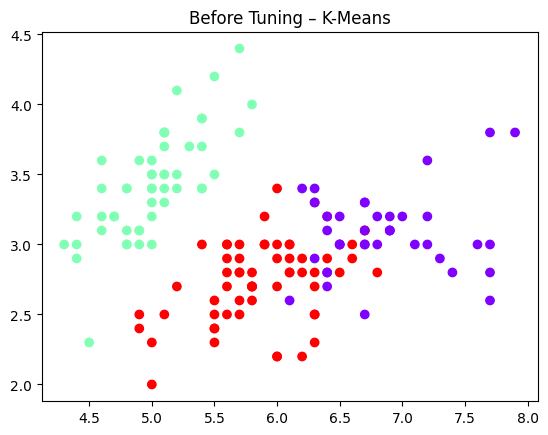

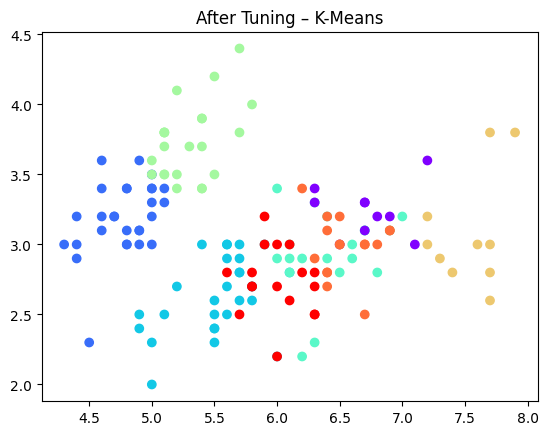

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=labels_default, cmap='rainbow')
plt.title("Before Tuning – K-Means")
plt.show()
filtered_best_params = {k: best_params[k] for k in param_grid if k in best_params}
plt.scatter(X[:,0], X[:,1], c=KMeans(**filtered_best_params).fit_predict(X), cmap='rainbow')
plt.title("After Tuning – K-Means")
plt.show()

Best Parameters (eps, min_samples): (0.1, 10)
Best Silhouette Score: 0.3966236575842454


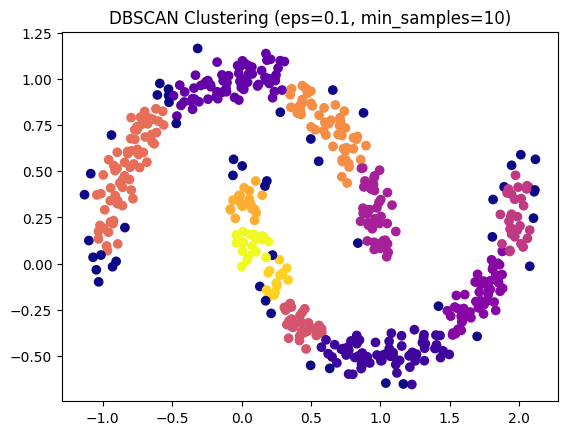

In [15]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
X, _ = make_moons(n_samples=500, noise=0.07, random_state=42)
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
min_samples_values = [3, 5, 8, 10]
best_score = -1
best_params = None
for eps in eps_values:
    for min_s in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_s)
        labels = model.fit_predict(X)
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_params = (eps, min_s)
print("Best Parameters (eps, min_samples):", best_params)
print("Best Silhouette Score:", best_score)
best_model = DBSCAN(eps=best_params[0], min_samples=best_params[1])
labels = best_model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title(f"DBSCAN Clustering (eps={best_params[0]}, min_samples={best_params[1]})")
plt.show()

In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score
import numpy as np
X = load_iris().data
best_score = -1
best_components = 0
for n in range(2, 8):
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_components = n
print("Optimal number of clusters (components):", best_components)
print("Highest Silhouette Score:", best_score)


Optimal number of clusters (components): 2
Highest Silhouette Score: 0.6867350732769777


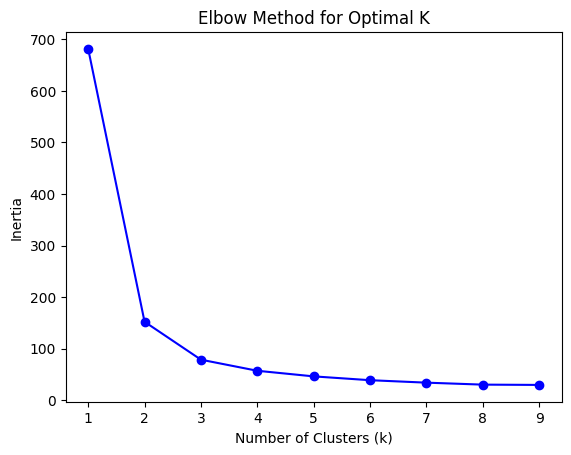

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
K = range(1, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [7]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
models = {
    "K-Means": KMeans(n_clusters=3, random_state=42),
    "DBSCAN": DBSCAN(eps=0.3, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=3)
}
for name, model in models.items():
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"{name}: Silhouette Score = {score:.3f}")

K-Means: Silhouette Score = 0.551
DBSCAN: Silhouette Score = -0.052
Agglomerative: Silhouette Score = 0.554


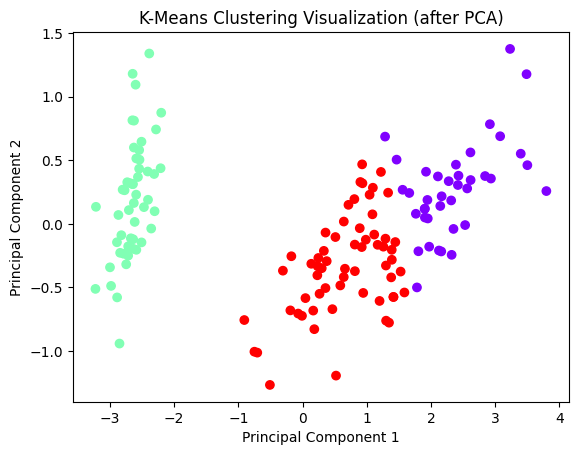

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='rainbow')
plt.title("K-Means Clustering Visualization (after PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


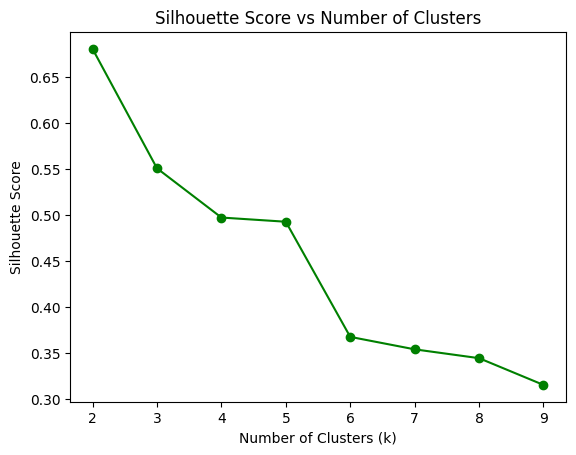

In [9]:
scores = []
clusters = range(2, 10)
for k in clusters:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.plot(clusters, scores, marker='o', color='green')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()
